# Data Cleaning & EDA - Part 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


pd.set_option('display.max_columns',None)
sns.set_theme(context='paper',style='darkgrid')

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('premiums.xlsx')
df.head(3)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164


In [3]:
df.columns = df.columns.str.replace(' ','_').str.lower()
df.head(1)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053


In [4]:
df.isna().sum()

age                       0
gender                    0
region                    0
marital_status            0
number_of_dependants      0
bmi_category              0
smoking_status           11
employment_status         2
income_level             13
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

## handling Na values

In [5]:
df.dropna(inplace=True)

In [6]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [7]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [8]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


In [9]:
df['number_of_dependants'] = abs(df['number_of_dependants']) 
df['number_of_dependants'].describe()

count    49976.000000
mean         1.717284
std          1.491953
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

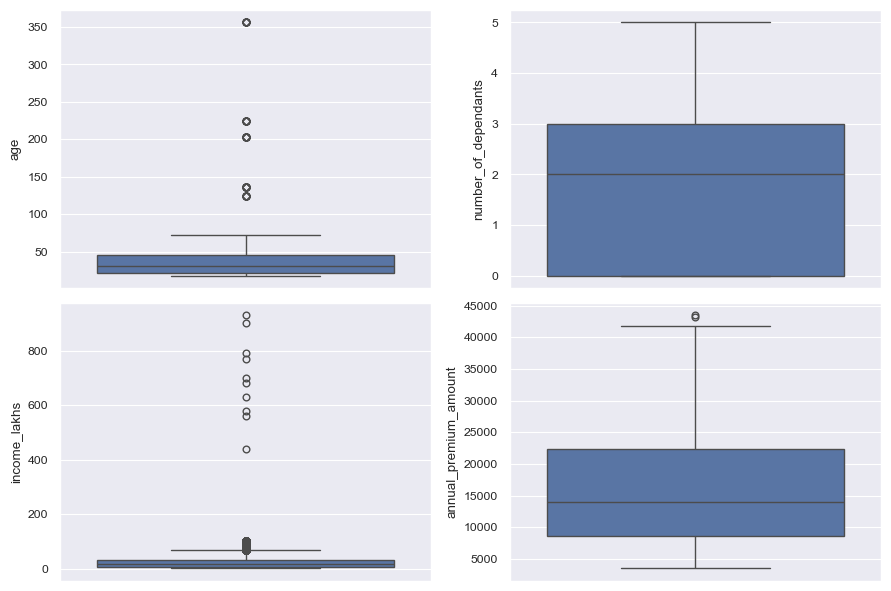

In [13]:
fig, axes = plt.subplots(2,2,figsize=(9,6))
axes = axes.flatten()
num_cols = [col for col in df.select_dtypes(exclude = 'object').columns]
for index, col in enumerate(num_cols):
    sns.boxplot(y=df[col],ax= axes[index])

plt.tight_layout()
plt.show() 

In [14]:
df1 = df[df.age<=100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49918.000000,49918.000000,49918.000000,49918.000000
mean,34.401839,1.717617,23.025141,15766.589286
std,13.681600,1.492074,24.227912,8419.137327
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22272.000000
max,72.000000,5.000000,930.000000,43471.000000


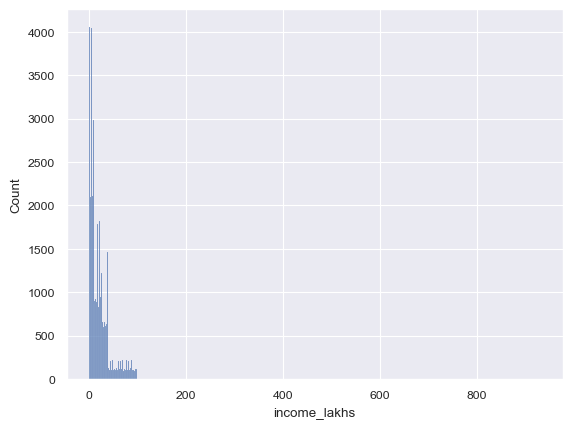

In [15]:
sns.histplot(df1['income_lakhs'])
plt.show()

In [18]:
def get_iqr(col):
    q1,q3 = np.quantile(df1[col],[0.25,0.75])
    iqr = q3-q1

    lower_bound = q1 - 1.5 * iqr 
    upper_bound = q3 + 1.5 * iqr 

    return lower_bound, upper_bound

In [21]:
get_iqr('income_lakhs')

quantile_threshold = df1.income_lakhs.quantile(0.999)


In [ ]:
df2=df1[df1['income_lakhs']<=quantile_threshold].copy()
df2.describe()

# Data Cleaning & EDA - Part 2

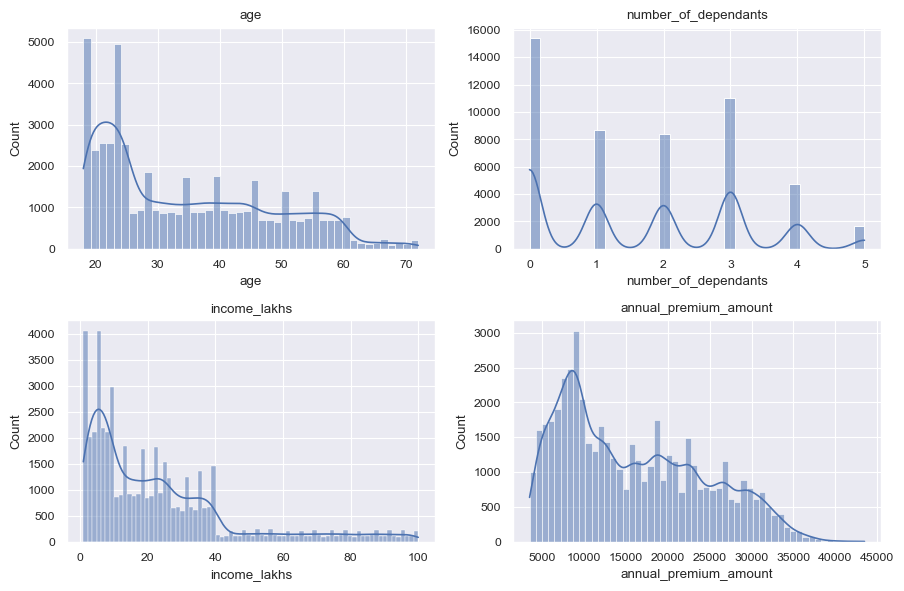

In [30]:
fig, axes = plt.subplots(2,2,figsize=(9,6))
axes = axes.flatten()
num_cols = [col for col in df2.select_dtypes(exclude = 'object').columns]
for index, col in enumerate(num_cols):
    sns.histplot(df2[col],ax= axes[index],kde=True)
    axes[index].set_title(col)

plt.tight_layout()
plt.show() 

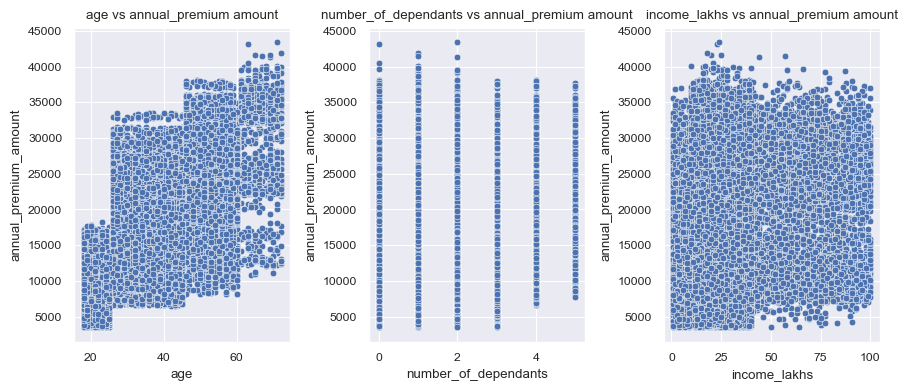

In [35]:
fig, axes = plt.subplots(1,3,figsize=(9,4))
axes = axes.flatten()
for index, col in enumerate(['age', 'number_of_dependants', 'income_lakhs']):
    sns.scatterplot(x=df2[col],y=df2['annual_premium_amount'],ax=axes[index])
    axes[index].set_title(f"{col} vs annual_premium amount")

plt.tight_layout()
plt.show()

In [39]:
cat_cols = [col for col in df2.select_dtypes('object').columns]

In [37]:
df2['smoking_status']=df2['smoking_status'].apply(lambda row: 'No Smoking' if row not in ['Regular', 'Occasional'] else row )

In [60]:
dam = df2['gender'].value_counts(normalize=True)*100

dam.values

array([54.96313216, 45.03686784])

In [56]:
(df2[col].value_counts(normalize=True)*100).values

array([54.96313216, 45.03686784])

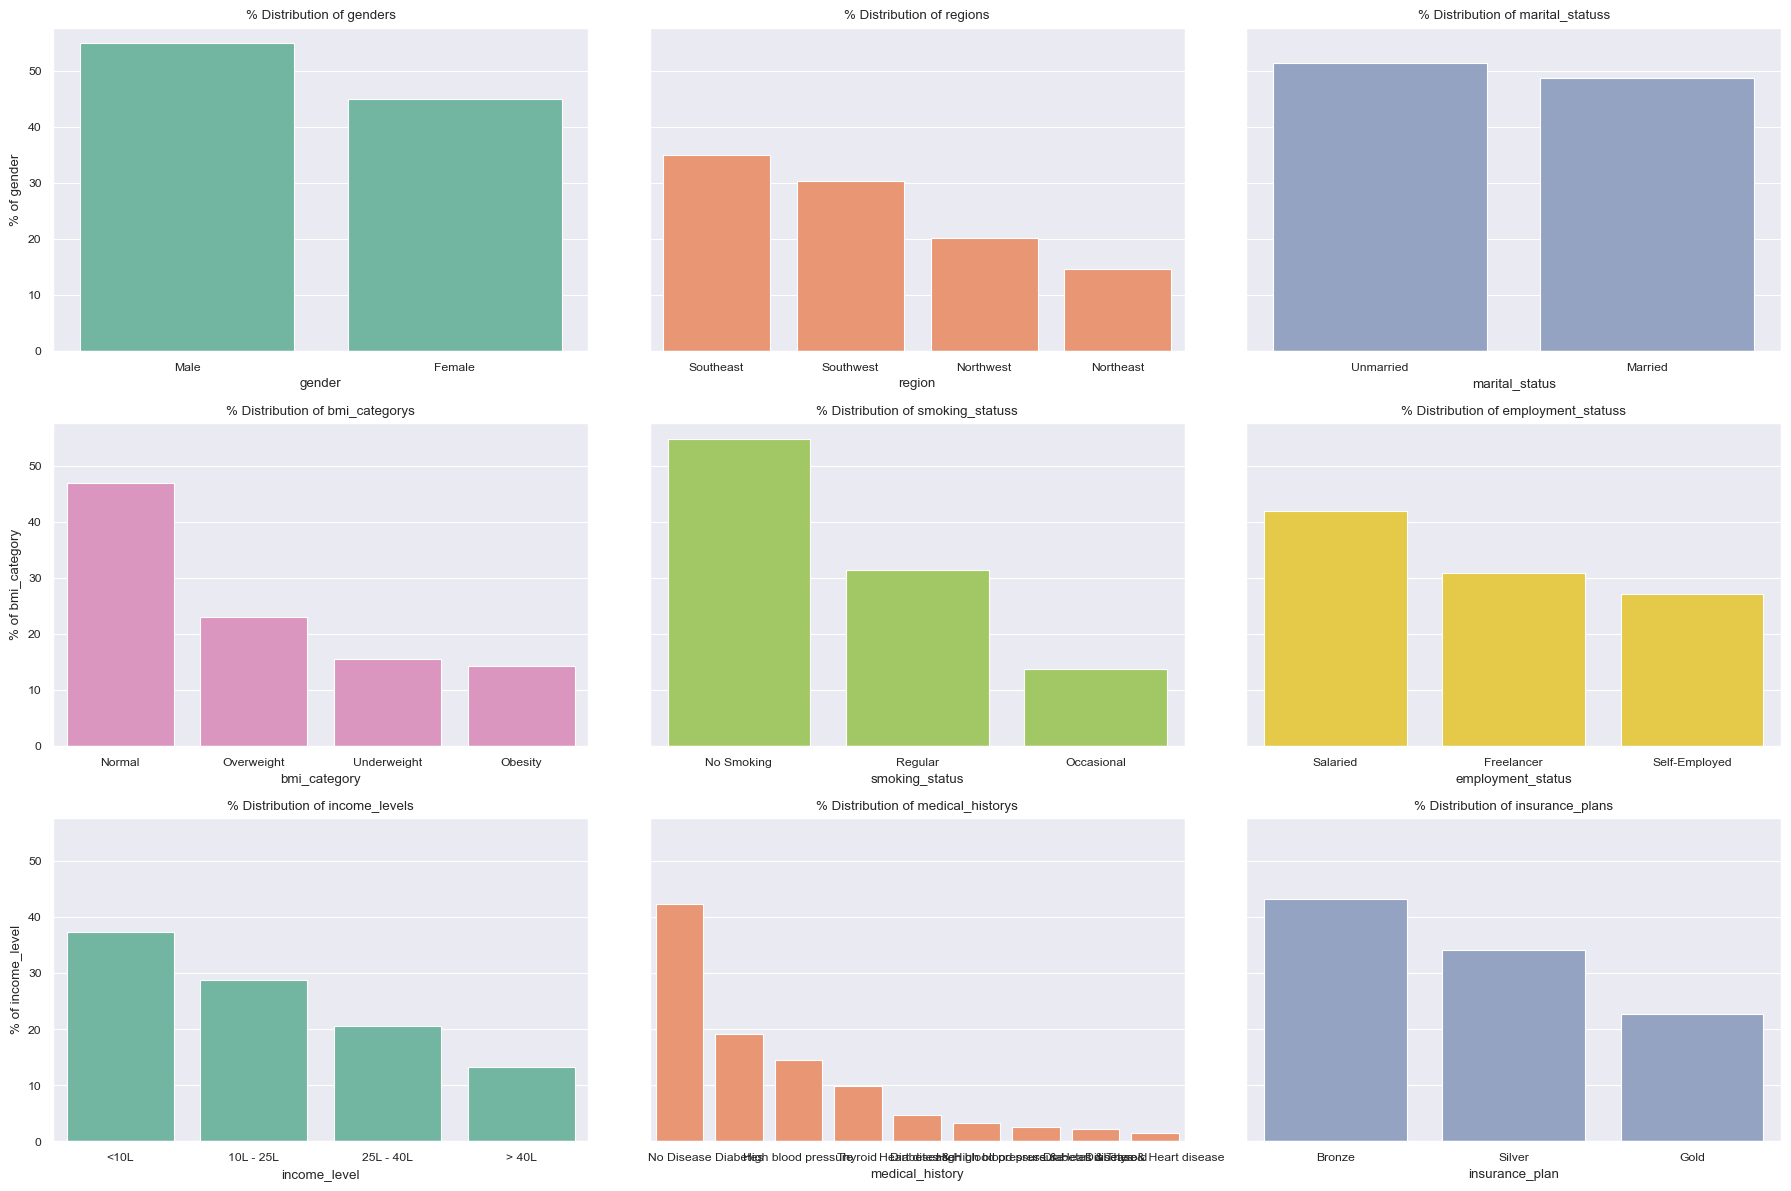

In [ ]:
n_col = 3
n_row = len(cat_cols)//n_col
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']
fig, axes = plt.subplots(nrows=n_row, ncols=n_col, figsize=(6*n_col, 4*n_row),sharey=True)
axes = axes.flatten()

for index, col in enumerate(cat_cols):
    cat_count = df2[col].value_counts(normalize=True)*100
    plot = sns.barplot(y=cat_count.values,x=cat_count.index,ax=axes[index],color =colors[index % len(colors)])

    axes[index].set_title(f"% Distribution of {col}")
    axes[index].set_ylabel(f"% of {col}")


plt.tight_layout()
plt.show()



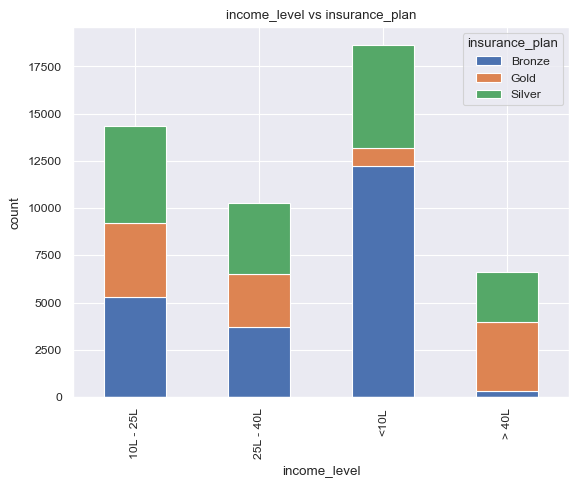

In [71]:
crss = pd.crosstab(df2['income_level'],df2['insurance_plan'])
crss.plot(kind='bar',stacked=True)
plt.title('income_level vs insurance_plan')
plt.ylabel('count')
plt.show()

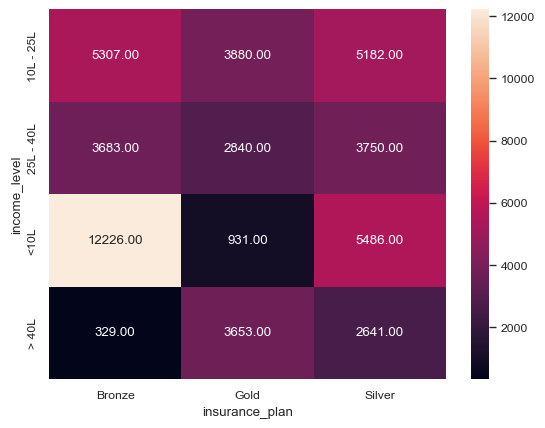

In [75]:
sns.heatmap(crss, annot=True, fmt='.2f')
plt.show()

# Feature Engineering

In [ ]:
risk_scores = {
    'diabetes':6,
    'high blood pressure':6,
    'no disease':0,
    'thyroid':5,
    'heart disease':8,
    'none':0
}

In [84]:
df2[['disease1','disease2']] = df2['medical_history'].str.split(' & ',expand=True).apply(lambda row: row.str.lower())

In [87]:
df2[['disease1','disease2']].fillna('none',inplace=True)

In [88]:
df2['total_risk'] = 0

In [99]:
for disease in ['disease1','disease2']:
    print(df2[disease])
    break

0                   diabetes
1                   diabetes
2        high blood pressure
3                 no disease
4        high blood pressure
                ...         
49995             no disease
49996                thyroid
49997             no disease
49998             no disease
49999               diabetes
Name: disease1, Length: 49908, dtype: object
